In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import stats as st
import statsmodels.api as sm


import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from sklearn.metrics import r2_score,mean_squared_error 

plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

### 1. Reading the Data 

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df.shape 

(45593, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [6]:
df.describe(include="object")

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593
unique,45593,1320,23,29,44,177,193,7,5,4,4,5,3,4,45
top,0x4607,PUNERES01DEL01,35,4.8,15-03-2022,NaN,21:30:00,conditions Fog,Low,Snack,motorcycle,1,No,Metropolitian,(min) 26
freq,1,67,2262,7148,1192,1731,496,7654,15477,11533,26435,28159,44469,34093,2123


### 2. Data Preprocessing and Visualization 

In [7]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [8]:
# Rename the column names 
df.rename(columns = {"City":"City_area","Weatherconditions":"Weather_conditions","Time_taken(min)":"Time_taken"},inplace=True)

* Extracting city from delivery person id col
* Extracting time from time taken col and coverting to int

In [9]:
df["City"] = df["Delivery_person_ID"].str.split("RES").str[0]
df["Time_taken"] = df["Time_taken"].str.split(" ").str[-1].astype("int")

In [10]:
# drop unuseful columns 
df.drop(columns = ["ID","Delivery_person_ID"],axis=1,inplace=True)

In [11]:
# checking duplicates 
df[df.duplicated()]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_area,Time_taken,City


In [12]:
# checking null values 
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City_area                      0
Time_taken                     0
City                           0
dtype: int64

In [13]:
# we have seen already nan in describe method 
nan_length = df["Time_Orderd"].value_counts().index[0]
print(f"{nan_length} lan_length : {len(nan_length)}")

NaN  lan_length : 4


In [14]:
# checking string value of nan in every column may be there are chances that they have written in other form like 'nan'
df1 = df.select_dtypes(include = "object")
for col in df1.columns:
    nan_count = (df1[col].apply(lambda x:x.strip().lower().find("nan"))>=0).sum()
    print(f"{col} null count : {nan_count}")

Delivery_person_Age null count : 1854
Delivery_person_Ratings null count : 1908
Order_Date null count : 0
Time_Orderd null count : 1731
Time_Order_picked null count : 0
Weather_conditions null count : 616
Road_traffic_density null count : 601
Type_of_order null count : 0
Type_of_vehicle null count : 0
multiple_deliveries null count : 993
Festival null count : 228
City_area null count : 1200
City null count : 0


In [15]:
# replacing string nan with float nan 
for col in df1.columns:
    df1[col] = df1[col].apply(lambda x:x.strip().lower())
    df1[col].replace("nan",np.nan,regex = True,inplace=True)

In [16]:
# again checking nulls 
df1.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings    1908
Delivery_person_Age        1854
Time_Orderd                1731
City_area                  1200
multiple_deliveries         993
Weather_conditions          616
Road_traffic_density        601
Festival                    228
Order_Date                    0
Time_Order_picked             0
Type_of_order                 0
Type_of_vehicle               0
City                          0
dtype: int64

In [17]:
df2 = pd.concat([df1,df.select_dtypes(exclude="object")],axis=1)
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_area,City,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken
0,37,4.9,19-03-2022,11:30:00,11:45:00,conditions sunny,high,snack,motorcycle,0,no,urban,indo,22.745049,75.892471,22.765049,75.912471,2,24
1,34,4.5,25-03-2022,19:45:00,19:50:00,conditions stormy,jam,snack,scooter,1,no,metropolitian,bang,12.913041,77.683237,13.043041,77.813237,2,33
2,23,4.4,19-03-2022,08:30:00,08:45:00,conditions sandstorms,low,drinks,motorcycle,1,no,urban,bang,12.914264,77.678400,12.924264,77.688400,0,26
3,38,4.7,05-04-2022,18:00:00,18:10:00,conditions sunny,medium,buffet,motorcycle,1,no,metropolitian,coimb,11.003669,76.976494,11.053669,77.026494,0,21
4,32,4.6,26-03-2022,13:30:00,13:45:00,conditions cloudy,high,snack,scooter,1,no,metropolitian,chen,12.972793,80.249982,13.012793,80.289982,1,30


In [18]:
# updating the datatype 

df2["Delivery_person_Age"] = df2["Delivery_person_Age"].astype("float")
df2["Delivery_person_Ratings"] = df2["Delivery_person_Ratings"].astype("float")
df2["Order_Date"] = pd.to_datetime(df2["Order_Date"])
df2["multiple_deliveries"] = df2["multiple_deliveries"].astype("float")

In [19]:
for col in df2.select_dtypes(include="object").columns[2:]:
    print(f"{col}\n{df2[col].value_counts()}")
    print()

Weather_conditions
conditions fog           7654
conditions stormy        7586
conditions cloudy        7536
conditions sandstorms    7495
conditions windy         7422
conditions sunny         7284
Name: Weather_conditions, dtype: int64

Road_traffic_density
low       15477
jam       14143
medium    10947
high       4425
Name: Road_traffic_density, dtype: int64

Type_of_order
snack     11533
meal      11458
drinks    11322
buffet    11280
Name: Type_of_order, dtype: int64

Type_of_vehicle
motorcycle          26435
scooter             15276
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64

Festival
no     44469
yes      896
Name: Festival, dtype: int64

City_area
metropolitian    34093
urban            10136
semi-urban         164
Name: City_area, dtype: int64

City
jap       3443
ranchi    3229
bang      3195
sur       3187
hyd       3181
mum       3173
mys       3171
coimb     3170
vad       3166
indo      3159
chen      3145
pune      3132
agr 

In [20]:
# extracting only the weather type from column
df2["Weather_conditions"] = df2["Weather_conditions"].str.split(" ").str[-1]

* <i> Target Variable </i>

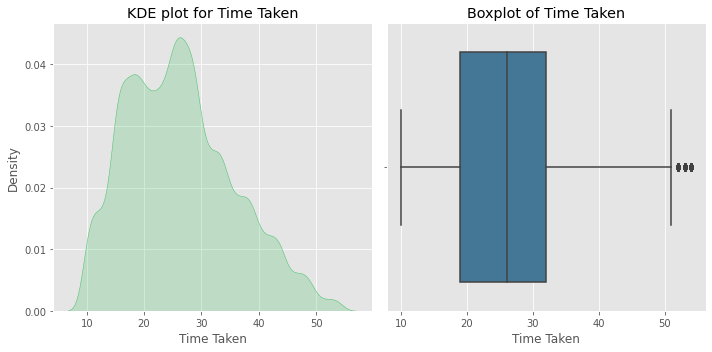

In [21]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
numeric_df = df2.select_dtypes(exclude="object")

sns.kdeplot(numeric_df["Time_taken"],ax = axes[0],fill = True,color=sns.color_palette("viridis")[4])
axes[0].set_title("KDE plot for Time Taken")
axes[0].set_xlabel("Time Taken")
axes[0].set_ylabel("Density")

sns.boxplot(numeric_df["Time_taken"],ax = axes[1],palette="mako")
axes[1].set_title("Boxplot of Time Taken")
axes[1].set_xlabel("Time Taken")

plt.tight_layout()
plt.show()

* Time taken somewhat follows right skewed distribution but not much as we can see there are typically low outliers from the boxplot 

* categoical column 

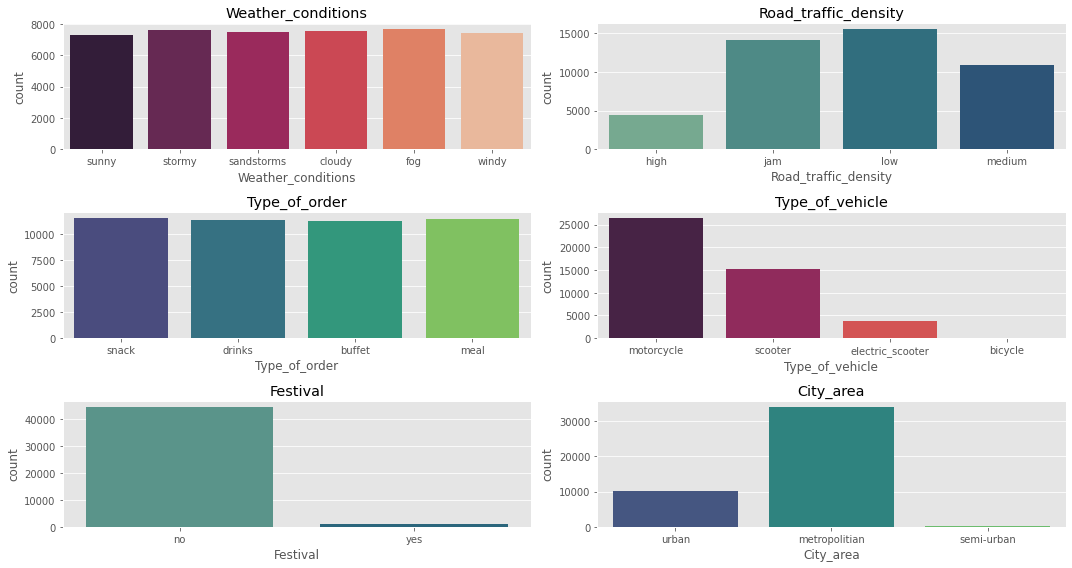

In [22]:
cat_df = df2.select_dtypes(include="object").iloc[:,2:-1]
palettes = ["rocket","crest","viridis"] * (len(cat_df.columns)//3)

fig,axes = plt.subplots(3,2,figsize=(15,8))
axes = axes.flatten()
for ax,column,palette in zip(axes,cat_df.columns,palettes):
    sns.countplot(cat_df[column],ax = ax,palette = palette)
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

* Weather conditions follows a uniform distribution
* Deliveries are predominantly made via motorcycle 
* road traffic density typically low,medium or jammed

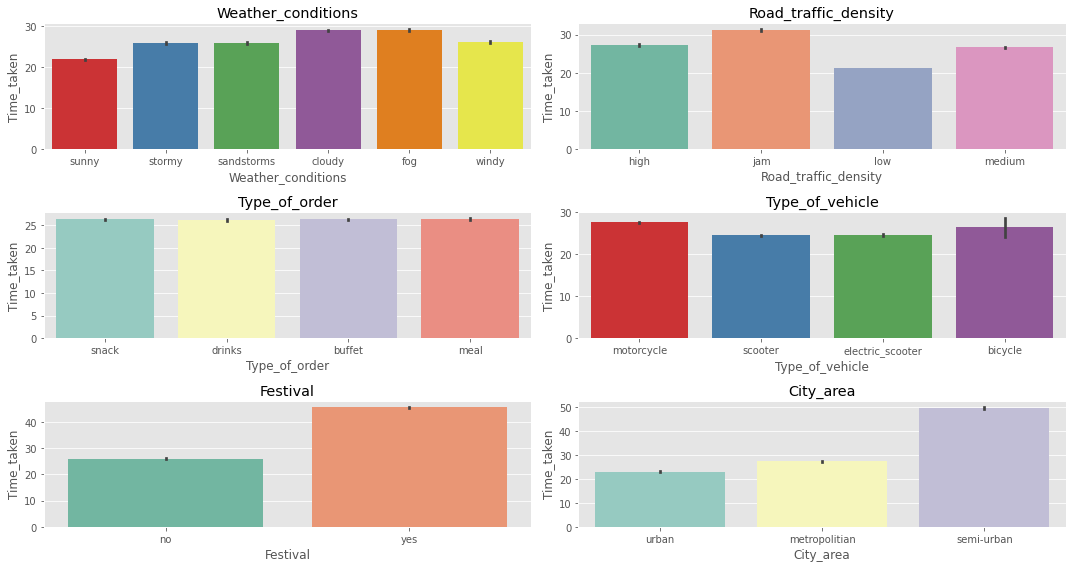

In [23]:
cat_df = df2.select_dtypes(include="object").iloc[:,2:-1]
palettes = ["Set1","Set2","Set3"] * (len(cat_df.columns)//3)

fig,axes = plt.subplots(3,2,figsize=(15,8))
axes = axes.flatten()
for ax,column,palette in zip(axes,cat_df.columns,palettes):
    sns.barplot(x = cat_df[column],y = numeric_df["Time_taken"],ax = ax,palette = palette)
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

<b>Less Time Taken</b> :- <i> Low Traffic or Sunny day or Electric Scooter or No Festival or Urban Area </i>

<b>More Time Taken</b> :- <i> Jammed Traffic or Fog day or Bicycle or Festival or Semi-urban Area </i>

* Numeric one 

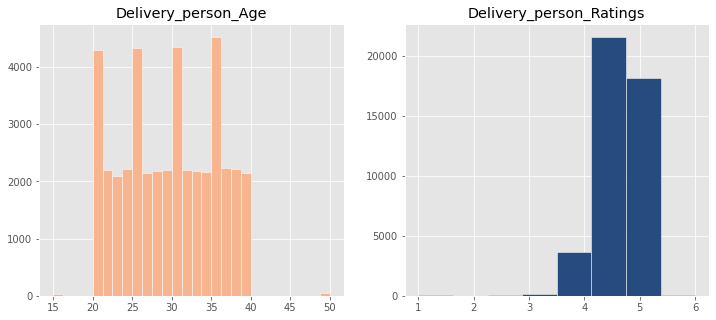

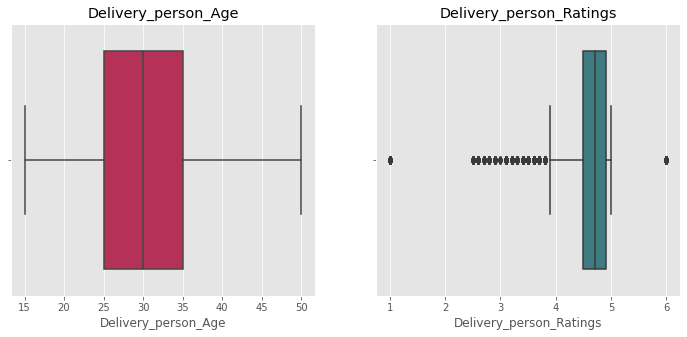

In [24]:
import math
num_cols = ["Delivery_person_Age","Delivery_person_Ratings"]

palettes = ["rocket","crest"]
fig,axes = plt.subplots(1,2,figsize=(12,5))

axes = axes.flatten()

for ax,palette,column in zip(axes,palettes,num_cols):
    n_bins = int(math.sqrt(numeric_df[column].max())) * 4
    ax.hist(numeric_df[column],color = sns.color_palette(palette)[5],edgecolor="white",bins=n_bins)
    ax.set_title(f"{column}")

fig_1,axes_1 = plt.subplots(1,2,figsize=(12,5))

for ax,palette,column in zip(axes_1,palettes,num_cols):
    sns.boxplot(numeric_df[column],ax = ax,palette = palette)
    ax.set_title(f"{column}")

plt.show()

* Delivery person age are in a range of 20 to 40 
* Quite a huge frequency between 4 to 5 (deliery person ratings) need to check for rating 6 

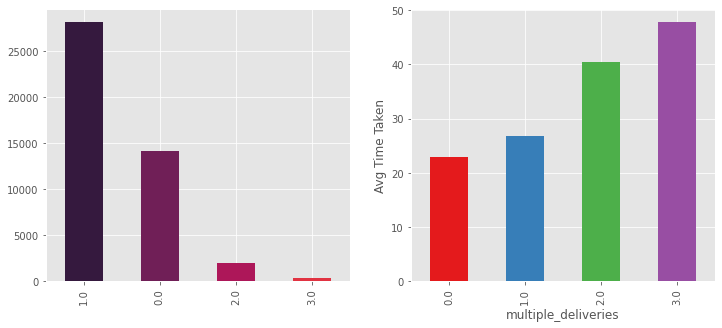

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
numeric_df["multiple_deliveries"].value_counts().plot(kind="bar",color=sns.color_palette("rocket"))

plt.subplot(1,2,2)
numeric_df.groupby("multiple_deliveries")["Time_taken"].mean().plot(kind="bar",color=sns.color_palette("Set1"))
plt.ylabel("Avg Time Taken")
plt.show()

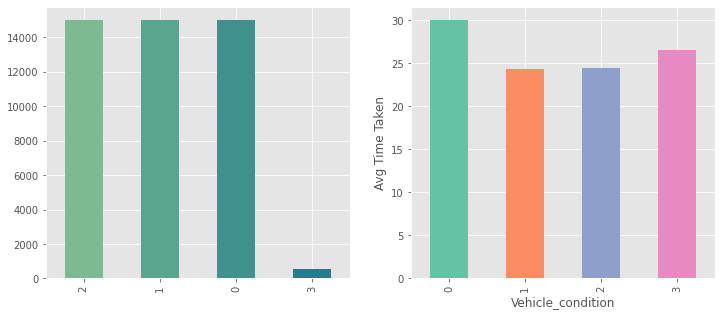

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
numeric_df["Vehicle_condition"].value_counts().plot(kind="bar",color=sns.color_palette("crest"))

plt.subplot(1,2,2)
numeric_df.groupby("Vehicle_condition")["Time_taken"].mean().plot(kind="bar",color=sns.color_palette("Set2"))
plt.ylabel("Avg Time Taken")
plt.show()

* Number of orders from each city with diff. location 

In [27]:
df2[["City","Restaurant_latitude","Restaurant_longitude"]].value_counts().to_frame()[:10]

0
City   Restaurant_latitude Restaurant_longitude      
vad    0.000000            0.000000              1590
ranchi 0.000000            0.000000               665
deh    0.000000            0.000000               245
agr    0.000000            0.000000               213
bhp    0.000000            0.000000               213
jap    26.911378           75.789034              182
       26.914142           75.805704              180
       26.902940           75.793007              176
       26.902908           75.792934              176
       26.892312           75.806896              176

* The coordinates (0, 0) are not valid locations for restaurants within India.

In [28]:
print(sum(df2["Restaurant_latitude"]==0.0))
print(sum(df2["Restaurant_longitude"]==0.0))

3640
3640


In [29]:
#check the coordinates within india 
print(len(df2[(df2["Restaurant_latitude"]>=8) & (df2["Restaurant_latitude"]<=37)]))
print(len(df2[(df2["Restaurant_longitude"]>=68) & (df2["Restaurant_longitude"]<=97)]))

41522
41791


* We can drop coordinates those showing (0,0)

In [30]:
df3 = df2[-((df2["Restaurant_latitude"]==0.0) & (df2["Restaurant_longitude"]==0.0)) ]

In [31]:
df3.shape 

(41953, 19)

In [32]:
restaurant_df = df3.groupby(["City","Restaurant_latitude","Restaurant_longitude"]).size().reset_index(name = "num_orders")

In [33]:
# max orders with each city and the restaurant coordinates 
top_restaurant = restaurant_df.loc[restaurant_df.groupby("City")["num_orders"].idxmax()]
top_restaurant.sort_values(by="num_orders",ascending=False)[:10]

,City,Restaurant_latitude,Restaurant_longitude,num_orders
368,jap,26.911378,75.789034,182
694,vad,22.308096,73.167753,172
293,hyd,17.430448,78.418213,170
116,bang,12.979166,77.640709,170
576,mys,12.323978,76.627961,170
642,ranchi,23.371292,85.327872,169
176,chen,13.058616,80.264151,168
212,coimb,11.025083,77.015393,168
323,indo,22.725748,75.898497,168
673,sur,21.171060,72.789292,167


* Order_Date 

In [34]:
print(f' year {df3["Order_Date"].dt.year.nunique()}')
print(f' month {df3["Order_Date"].dt.month.nunique()}')
print(f' days {df3["Order_Date"].dt.day.nunique()}')

 year 1
 month 12
 days 21


In [35]:
df3["month"] = df3["Order_Date"].dt.month
df3["day"] = df3["Order_Date"].dt.day

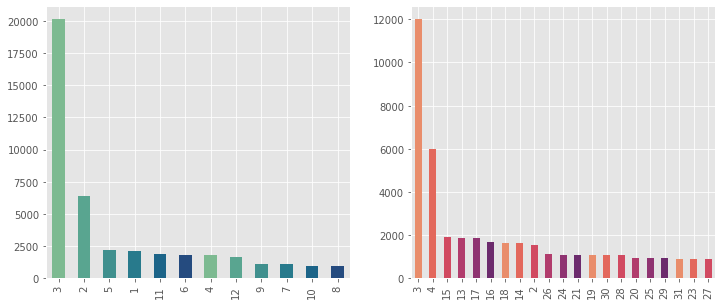

In [36]:
fig,axes = plt.subplots(1,2,figsize=(12,5))

df3["month"].value_counts().plot(kind="bar",color=sns.color_palette("crest"),ax = axes[0])

df3["day"].value_counts().plot(kind="bar",color=sns.color_palette("flare"),ax = axes[1])

plt.show()

* Majority of orders came form 3rd month of year 
* Also we can see that 3rd day of every month represent high number of orders 

### 3. Missing Values Treatment 

In [37]:
# lets check again for missing values 

df3.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1763
Delivery_person_Age            1719
Time_Orderd                    1600
City_area                      1114
multiple_deliveries             905
Weather_conditions              569
Road_traffic_density            555
Festival                        215
Type_of_vehicle                   0
Type_of_order                     0
Time_Order_picked                 0
Order_Date                        0
City                              0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
Time_taken                        0
month                             0
day                               0
dtype: int64

* Delivery Person Age 
* By seeing the distribution it looks like it is a uniform distribution

In [38]:
null_count = df3["Delivery_person_Age"].isnull().sum()
min_value = df3["Delivery_person_Age"].min()
max_value = df3["Delivery_person_Age"].max()
uniform_age_ary = np.random.randint(min_value,max_value,null_count)
uniform_age_ary

array([44, 41, 27, ..., 30, 32, 33])

In [39]:
# for checking 
age_b_df = df3.copy()

In [40]:
null_indices = df3[df3["Delivery_person_Age"].isnull()].index

In [41]:
df3.loc[null_indices,"Delivery_person_Age"] = uniform_age_ary

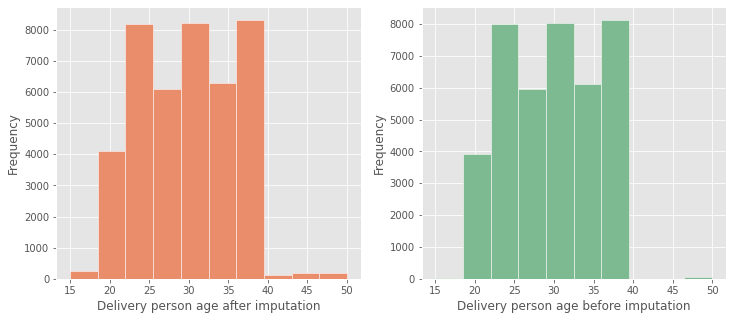

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df3["Delivery_person_Age"].plot(kind="hist",color=sns.color_palette("flare"),edgecolor="white")
plt.xlabel("Delivery person age after imputation")

plt.subplot(1,2,2)
age_b_df["Delivery_person_Age"].plot(kind="hist",color=sns.color_palette("crest"),edgecolor="white")
plt.xlabel("Delivery person age before imputation")

plt.show()

* Delivery person ratings 

In [43]:
df3["Delivery_person_Ratings"].describe()

count    40190.000000
mean         4.632386
std          0.335541
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

In [44]:
df3[df3["Delivery_person_Ratings"]>5].sample(4)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,...,City_area,City,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken,month,day
28974,50.0,6.0,2022-03-18,NaN,23:55:00,NaN,NaN,meal,electric_scooter,0.0,...,metropolitian,chen,-13.029780,-80.208812,13.099780,80.278812,3,20,3,18
38020,50.0,6.0,2022-03-20,NaN,23:10:00,NaN,NaN,meal,scooter,0.0,...,metropolitian,chen,13.026279,80.174568,13.106279,80.254568,3,14,3,20
42072,50.0,6.0,2022-03-17,NaN,20:40:00,NaN,NaN,buffet,scooter,0.0,...,metropolitian,indo,22.751234,75.889490,22.781234,75.919490,3,28,3,17
18977,50.0,6.0,2022-02-18,NaN,21:25:00,NaN,NaN,buffet,scooter,1.0,...,metropolitian,bhp,23.232537,77.429845,23.322537,77.519845,3,17,2,18


In [45]:
print((df3["Delivery_person_Ratings"]>5).sum())

46


* I assume that ratings feature have rating between 1 to 5
* We can considered as a missing values and we can impute with median value based on distribution 

In [46]:
# for checking 
rating_b_df = df3.copy()

In [47]:
df3["Delivery_person_Ratings"].fillna(df3["Delivery_person_Ratings"].median(),inplace=True)

In [48]:
rating_indices = df3[df3["Delivery_person_Ratings"]==6].index
df3.loc[rating_indices,"Delivery_person_Ratings"] = df3["Delivery_person_Ratings"].median()

In [49]:
print("Before")
print(rating_b_df["Delivery_person_Ratings"].describe())
print("------------------------------")
print("After")
print(df3["Delivery_person_Ratings"].describe())

Before
count    40190.000000
mean         4.632386
std          0.335541
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64
------------------------------
After
count    41953.000000
mean         4.633802
std          0.325577
min          1.000000
25%          4.500000
50%          4.700000
75%          4.800000
max          5.000000
Name: Delivery_person_Ratings, dtype: float64


* Imputing in categorical columns 

In [50]:
cols = ["multiple_deliveries","Road_traffic_density","City_area","Festival"]
for col in cols:
    df3[col].fillna(df3[col].mode()[0],inplace=True)    

In [51]:
w_types = df3["Weather_conditions"].unique()[:-1]

In [52]:
null_count_for_w = df3["Weather_conditions"].isnull().sum()

In [53]:
w_missing_list = []
for w_type in w_types:
    l = []
    for i in range(null_count_for_w//len(w_types)):
        l.append(w_type)
    w_missing_list.extend(l)

In [54]:
temp_df = df3[-(df3["Weather_conditions"].isnull())]
w_missing_list.extend(temp_df["Weather_conditions"].sample(null_count_for_w-len(w_missing_list)).values)

In [55]:
w_indices = df3[df3["Weather_conditions"].isnull()].index
df3.loc[w_indices,"Weather_conditions"] = w_missing_list

In [56]:
df3["Weather_conditions"].value_counts()

fog           7108
stormy        7068
cloudy        7026
sandstorms    7001
windy         6927
sunny         6823
Name: Weather_conditions, dtype: int64

### 4. Feature Engineering 

In [57]:
# adding is_weekend col and dayofweek
df3["day_of_week"] = df3["Order_Date"].dt.dayofweek # monday = 0 and sunday = 6
df3["is_weekend"] = df3["day_of_week"].apply(lambda x:1 if x in [5,6] else 0) # 5 = saturday and 6 = sunday
df3["quarter"] = df3["Order_Date"].dt.quarter 

In [58]:
df3[df3["is_weekend"]==1]["day"].unique()

array([19, 26,  3, 20, 13, 27,  4], dtype=int64)

* Feature Transformation

In [59]:
# convert categorical column to numerical form 
cat_cols = df3.select_dtypes(include = "object").columns[2:]
label_encoder = LabelEncoder()
for col in cat_cols:
    df3[col] = label_encoder.fit_transform(df3[col])

In [60]:
df3[cat_cols].sample(4)

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City_area,City
32944,1,3,2,2,0,2,9
7132,5,1,1,3,0,0,7
42074,1,2,1,1,0,0,11
26679,5,2,3,3,0,0,5


* Calculating distance between restaurant loc and delivery loc

In [61]:
df3.reset_index(drop=True,inplace=True)

In [62]:
# using haversine method 
def haversine_distance(loc_list):
    
    # earth's radius in km
    R = 6371.0
    
    # convert lat and lon from deg to radians 
    lat1,lon1,lat2,lon2 = map(np.radians,loc_list)
    
    # diff between lat and lon
    d_lat = lat2 - lat1 
    d_lon = lon2 - lon1 
        
    # applying haversine formula 
    a = np.sin(d_lat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    d = R * c 
    
    return round(d,2)

In [63]:
loc_cols = ["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

In [64]:
distance = []
for i in range(len(df3[loc_cols[0]])):
    location_list = [df3[loc_cols[j]][i] for j in range(len(loc_cols))]
    distance.append(haversine_distance(location_list))

In [65]:
df3["Distance"] = distance 

In [66]:
df3.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,...,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken,month,day,day_of_week,is_weekend,quarter,Distance
0,37.0,4.9,2022-03-19,11:30:00,11:45:00,4,0,3,2,0.0,...,22.765049,75.912471,2,24,3,19,5,1,1,3.03
1,34.0,4.5,2022-03-25,19:45:00,19:50:00,3,1,3,3,1.0,...,13.043041,77.813237,2,33,3,25,4,0,1,20.18
2,23.0,4.4,2022-03-19,08:30:00,08:45:00,2,2,1,2,1.0,...,12.924264,77.688400,0,26,3,19,5,1,1,1.55
3,38.0,4.7,2022-05-04,18:00:00,18:10:00,4,3,0,2,1.0,...,11.053669,77.026494,0,21,5,4,2,0,2,7.79
4,32.0,4.6,2022-03-26,13:30:00,13:45:00,0,0,3,3,1.0,...,13.012793,80.289982,1,30,3,26,5,1,1,6.21


* <b> Now we will impute the order time value by creating another model </b>

In [67]:
df5 = df3.copy()
df5.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_Date',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City_area', 'City',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Vehicle_condition', 'Time_taken', 'month', 'day', 'day_of_week',
       'is_weekend', 'quarter', 'Distance'],
      dtype='object')

In [68]:
# taking non null order time records for training the model 
train_val_df = df5[-(df5["Time_Orderd"].isnull())]
train_val_df.shape 

(40353, 25)

In [69]:
train_val_df = pd.concat([train_val_df.iloc[:,:13],train_val_df.iloc[:,17:]],axis=1)

In [70]:
# checking for 24 hour format
print((pd.to_datetime(train_val_df["Time_Orderd"]).dt.hour>12).max())
print((pd.to_datetime(train_val_df["Time_Order_picked"]).dt.hour>12).max())

True
True


In [71]:
train_val_df[train_val_df["Time_Order_picked"]<train_val_df["Time_Orderd"]]["Time_Order_picked"].str.split(":").str[0].unique()

array(['00'], dtype=object)

In [72]:
def order_picked_frac(a):
    curr_time = sum([int(item) * 3600/60**i for i,item in enumerate(a.split(":"))])
    if a.split(":")[0]=="00":
        lag_time = 24 * 3600 
        return (lag_time + curr_time)/(24 * 3600)
    else:
        return curr_time/(24 * 3600)

In [73]:
train_val_df["order_picked_frac"] = train_val_df["Time_Order_picked"].apply(lambda x:order_picked_frac(x))

In [74]:
def order_time_frac(a):
    if sum(map(int,a.split(":")))==0:
           return 1.0
    else:
        return sum([int(item) * 3600/60**i for i,item in enumerate(a.split(":"))])/(24*3600)

In [75]:
train_val_df["order_time_frac"] = train_val_df["Time_Orderd"].apply(lambda x:order_time_frac(x))

In [76]:
train_val_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,...,Vehicle_condition,Time_taken,month,day,day_of_week,is_weekend,quarter,Distance,order_picked_frac,order_time_frac
0,37.0,4.9,2022-03-19,11:30:00,11:45:00,4,0,3,2,0.0,...,2,24,3,19,5,1,1,3.03,0.489583,0.479167
1,34.0,4.5,2022-03-25,19:45:00,19:50:00,3,1,3,3,1.0,...,2,33,3,25,4,0,1,20.18,0.826389,0.822917
2,23.0,4.4,2022-03-19,08:30:00,08:45:00,2,2,1,2,1.0,...,0,26,3,19,5,1,1,1.55,0.364583,0.354167
3,38.0,4.7,2022-05-04,18:00:00,18:10:00,4,3,0,2,1.0,...,0,21,5,4,2,0,2,7.79,0.756944,0.750000
4,32.0,4.6,2022-03-26,13:30:00,13:45:00,0,0,3,3,1.0,...,1,30,3,26,5,1,1,6.21,0.572917,0.562500


In [77]:
X = train_val_df.drop(["Order_Date","Time_Orderd","Time_Order_picked","order_time_frac"],axis=1)
y = train_val_df["order_time_frac"]

In [78]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_area,City,Vehicle_condition,Time_taken,month,day,day_of_week,is_weekend,quarter,Distance,order_picked_frac
0,37.0,4.9,4,0,3,2,0.0,0,2,10,2,24,3,19,5,1,1,3.03,0.489583
1,34.0,4.5,3,1,3,3,1.0,0,0,3,2,33,3,25,4,0,1,20.18,0.826389
2,23.0,4.4,2,2,1,2,1.0,0,2,3,0,26,3,19,5,1,1,1.55,0.364583
3,38.0,4.7,4,3,0,2,1.0,0,0,6,0,21,5,4,2,0,2,7.79,0.756944
4,32.0,4.6,0,0,3,3,1.0,0,0,5,1,30,3,26,5,1,1,6.21,0.572917


In [79]:
y.head()

0    0.479167
1    0.822917
2    0.354167
3    0.750000
4    0.562500
Name: order_time_frac, dtype: float64

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state = 42)

print(f"X_train_Shape:{X_train.shape}")
print(f"X_test_Shape:{X_test.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")

X_train_Shape:(34300, 19)
X_test_Shape:(6053, 19)
y_train.shape:(34300,)
y_test.shape:(6053,)


In [81]:
# training model 
rf = RandomForestRegressor(n_estimators = 150,max_features = "sqrt",max_depth = 15 )
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150)

In [82]:
print(f"Training accuracy:{rf.score(X_train,y_train)}")
print(f"Test accuracy:{rf.score(X_test,y_test)}")

Training accuracy:0.9990016131317883
Test accuracy:0.9981862659474308


In [83]:
y_test_pred = rf.predict(X_test)
pred_df = pd.DataFrame({"y_test_pred":y_test_pred,"y_test":y_test})
pred_df.sample(5)

,y_test_pred,y_test
15890,0.767891,0.774306
2734,0.970328,0.979167
30297,0.831799,0.826389
21056,0.779437,0.788194
30194,0.951283,0.958333


In [84]:
# Training with all data 

rf = RandomForestRegressor(n_estimators = 150,max_features = "sqrt",max_depth = 15 )
rf.fit(X,y)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150)

* Preparing the test data

In [85]:
test_df = df3[df3["Time_Orderd"].isnull()]
test_df= pd.concat([test_df.iloc[:,:13],test_df.iloc[:,17:]],axis=1)

In [86]:
test_df["order_picked_frac"] = test_df["Time_Order_picked"].apply(lambda x:order_picked_frac(x))

In [87]:
X_test = test_df.drop(["Order_Date","Time_Orderd","Time_Order_picked"],axis=1)
X_test_pred = rf.predict(X_test)
test_df["order_time_frac"] = X_test_pred 

In [88]:
# convert order_time_frac to order_time 

hour_s = ((test_df["order_time_frac"]*3600*24)//3600).astype("int") 
min_s = (((test_df["order_time_frac"]*3600*24)%3600)//60).astype("int")

test_df["Time_Orderd"] = hour_s.astype("str").str.zfill(2) + ":" + min_s.astype("str").str.zfill(2) + ":00"

## 5. Outlier Treatment 

In [89]:
# Combining Data 
df6 = pd.concat([train_val_df,test_df],axis=0)

          Distance
count  41953.00000
mean     107.06008
std     1146.11866
min        1.47000
25%        4.66000
50%        9.22000
75%       13.76000
max    19692.67000
-----------------
0.75    13.76
0.80    16.11
0.85    16.85
0.90    19.40
0.95    20.18
Name: Distance, dtype: float64
-----------------


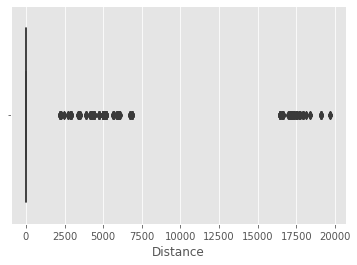

In [90]:
# lets check distance col
print(df6["Distance"].describe().to_frame())
print("-----------------")
print(df6["Distance"].quantile([0.75,0.8,0.85,0.9,0.95]))
print("-----------------")
sns.boxplot(df6["Distance"],palette="crest")
plt.show()

* Clearly there are outliers in the distance column 

In [91]:
df6[df6["Distance"]>=25].sample(5)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,...,Vehicle_condition,Time_taken,month,day,day_of_week,is_weekend,quarter,Distance,order_picked_frac,order_time_frac
6750,38.0,4.7,2022-11-02,22:04:00,22:20:00,3,2,1,1,1.0,...,3,17,11,2,2,0,4,18387.88,0.930556,0.919484
24892,38.0,4.7,2022-05-03,22:12:00,22:30:00,0,2,2,2,0.0,...,1,21,5,3,1,0,2,16460.01,0.937500,0.925458
32606,36.0,4.7,2022-11-02,09:15:00,09:30:00,1,2,0,3,0.0,...,1,15,11,2,2,0,4,3466.32,0.395833,0.385417
32504,34.0,4.7,2022-05-04,22:51:00,23:20:00,1,2,1,3,1.0,...,3,10,5,4,2,0,2,17900.65,0.972222,0.952098
40163,30.0,4.8,2022-02-15,10:55:00,11:10:00,4,2,0,2,1.0,...,1,10,2,15,1,0,1,5891.68,0.465278,0.454861


In [92]:
# We can drop these records 
df7 = df6[-(df6["Distance"]>25)]
df7.reset_index(drop=True,inplace=True)

In [93]:
df7.shape 

(41522, 23)

In [94]:
# lets check records where order_time > order_picked_time 

df7[df7["order_picked_frac"]<df7["order_time_frac"]].shape

(416, 23)

In [95]:
# creating new column order_prepare_time which is a difference between order_picked_time and order_time 

order_prepare_time_frac = df7["order_picked_frac"]-df7["order_time_frac"]

seconds_in_day = 24 * 3600 

df7["order_prepare_time"] = round((order_prepare_time_frac * seconds_in_day)/60,2)

count    41522.000000
mean         9.613523
std          7.328370
min       -189.570000
25%          5.000000
50%         10.000000
75%         15.000000
max         76.150000
Name: order_prepare_time, dtype: float64
----------------------------
0.75    15.0
0.80    15.0
0.85    15.0
0.90    15.0
0.95    15.0
Name: order_prepare_time, dtype: float64
----------------------------


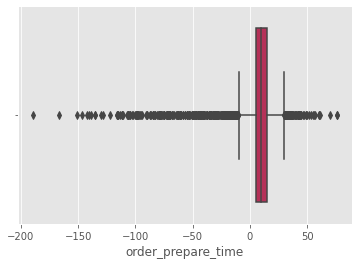

In [96]:
print(df7["order_prepare_time"].describe())

print("----------------------------")

print(df7["order_prepare_time"].quantile([0.75,0.8,0.85,0.9,0.95]))

print("----------------------------")

sns.boxplot(df7["order_prepare_time"],palette="rocket")
plt.show()

In [97]:
df7[df7["order_prepare_time"]<0].shape 

(416, 24)

In [98]:
# We can impute these  order_prepare_time(-) with mean or median

df7.loc[df7[df7["order_prepare_time"]<0].index,"order_prepare_time"] = df7["order_prepare_time"].median()

In [99]:
# now we can drop some columns & then our data is ready for modelling 

df8 = df7.drop(["Order_Date","Time_Orderd","Time_Order_picked","order_picked_frac","order_time_frac"],axis=1)

In [100]:
df8.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_area,City,Vehicle_condition,Time_taken,month,day,day_of_week,is_weekend,quarter,Distance,order_prepare_time
0,37.0,4.9,4,0,3,2,0.0,0,2,10,2,24,3,19,5,1,1,3.03,15.0
1,34.0,4.5,3,1,3,3,1.0,0,0,3,2,33,3,25,4,0,1,20.18,5.0
2,23.0,4.4,2,2,1,2,1.0,0,2,3,0,26,3,19,5,1,1,1.55,15.0
3,38.0,4.7,4,3,0,2,1.0,0,0,6,0,21,5,4,2,0,2,7.79,10.0
4,32.0,4.6,0,0,3,3,1.0,0,0,5,1,30,3,26,5,1,1,6.21,15.0


## 6. Feature Scalling 

In [101]:
X = df8.drop("Time_taken",axis=1)
y = df8["Time_taken"]

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42)
print(f"X_train_shape:{X_train.shape}")
print(f"X_test_shape:{X_test.shape}")
print(f"y_train_shape:{y_train.shape}")
print(f"y_test_shape:{y_test.shape}")

X_train_shape:(35293, 18)
X_test_shape:(6229, 18)
y_train_shape:(35293,)
y_test_shape:(6229,)


In [103]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_area,City,Vehicle_condition,month,day,day_of_week,is_weekend,quarter,Distance,order_prepare_time
7568,34.0,4.6,5,0,3,3,1.0,0,2,17,1,9,3,5,1,3,6.22,5.0
25016,20.0,4.8,1,2,1,1,0.0,0,0,6,2,3,21,0,0,1,3.12,15.0
1510,27.0,4.4,1,1,1,3,1.0,0,0,3,1,3,20,6,1,1,10.87,5.0
33425,39.0,4.9,0,1,2,2,2.0,0,0,10,0,6,4,5,1,2,16.64,10.0
15145,28.0,5.0,5,3,3,3,1.0,0,0,17,2,3,29,1,0,1,12.44,5.0


In [104]:
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### 7.Cross Validation 

In [105]:
# cross validation with default parameters
rf = RandomForestRegressor(random_state = 42)

# using 5-fold cross validation 
cv_scores = cross_val_score(estimator = rf,X = X_train,y = y_train,cv = 5,scoring="r2")

print("Each Model Score")

for cv_score in cv_scores:
    print(cv_score)
    
print("----------------")

print("Mean Score")

print(cv_scores.mean())

Each Model Score
0.8156679833713782
0.8154769535694097
0.8218737499952199
0.8168259904105312
0.8119006799299235
----------------
Mean Score
0.8163490714552925


In [106]:
# Train the model with whole training data and evaluate on test data

rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)

y_test_pred = rf.predict(X_test)

print(f"r2_score on test set:{r2_score(y_test,y_test_pred)}")

r2_score on test set:0.8269513454704649


### 8.Hyperparameter Tuning with Cross Validation 

In [107]:
n_models = [Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),LGBMRegressor()]

model_params = [
    {"alpha":[0.01,0.1,10,100]},
    {"max_depth":[3,5,7,9,12],"min_samples_split" : [3,5,7]},
    {"max_depth":[5,10,15,20,25],"min_samples_split": [4,7,10],"n_estimators":[100,200,300,400]},
    {"learning_rate":[0.01,0.05,0.1,0.25],"max_depth":[5,10,15,20,25],"n_estimators":[100,200,300,400]},
    {"num_leaves":[15,20,25,30],"learning_rate":[0.01,0.05,0.1,0.25],"n_estimators":[200,300,400,500]}
]


for model,param in zip(n_models,model_params):
    grid_search = GridSearchCV(model,param,cv = 5,scoring="r2")
    grid_search.fit(X_train,y_train)
    
    
    print(f"Model : {model.__class__.__name__}")
    print("Best Parameter :", grid_search.best_params_)
    print("Best r2 Score :", grid_search.best_score_)
    print("-------------------------")

Model : Ridge
Best Parameter : {'alpha': 0.1}
Best r2 Score : 0.48637576223509293
-------------------------
Model : DecisionTreeRegressor
Best Parameter : {'max_depth': 9, 'min_samples_split': 5}
Best r2 Score : 0.8025331078566346
-------------------------
Model : RandomForestRegressor
Best Parameter : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best r2 Score : 0.8225109277832463
-------------------------
Model : XGBRegressor
Best Parameter : {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100}
Best r2 Score : 0.8248881826059078
-------------------------
Model : LGBMRegressor
Best Parameter : {'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 30}
Best r2 Score : 0.8247164955567797
-------------------------


### 9.Final Model and Evaluation 

In [112]:
lgbm = LGBMRegressor(learning_rate = 0.05,n_estimators = 300,num_leaves = 30,random_state = 42)

lgbm.fit(X_train,y_train)

y_test_pred = lgbm.predict(X_test)


print(f"r2_score on test:{r2_score(y_test,y_test_pred)}")
print(f"Root mean squared error on test:{np.sqrt(mean_squared_error(y_test,y_test_pred))}")

r2_score on test:0.8356054866409162
Root mean squared error on test:3.798427218052369
